In [1]:
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
from scipy.spatial import distance
%matplotlib inline

# (a) Download The Face Dataset. After you unzip faces.zip, you will find a folder called images
# which contains all the training and test images; train.txt and test.txt specifies the training set
# and test (validation) set split respectively, each line gives an image path and the corresponding
# label.
# (b) Load the training set into a matrix X: there are 540 training images in total, each has 50 × 50
# pixels that need to be concatenated into a 2500-dimensional vector. So the size of X should
# be 540×2500, where each row is a flattened face image. Pick a face image from X and display
# that image in grayscale. Do the same thing for the test set. The size of matrix Xtest for the test
# set should be 100×2500.

def get_data(path):
    labels, data = [], []
    for line in open(path):
        im = misc.imread(line.strip().split()[0])
        data.append(im.reshape(2500,))
        labels.append(line.strip().split()[1])
    data, labels = np.array(data, dtype=float), np.array(labels, dtype=int)
    print data.shape, labels.shape
    plt.imshow(data[10, :].reshape(50,50), cmap = cm.Greys_r)
    plt.show()
    return data, labels

(540, 2500) (540,)


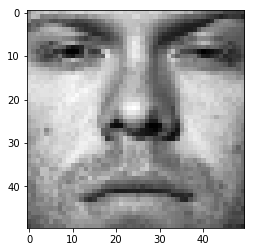

(100, 2500) (100,)


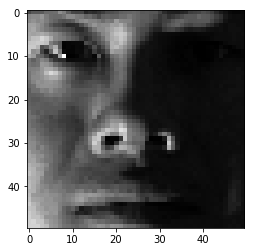

In [2]:
train_data,train_label = get_data('./faces/train.txt')
test_data,test_label = get_data('./faces/test.txt')

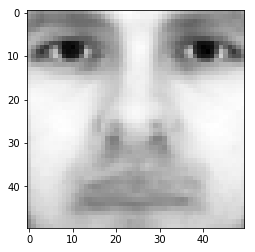

In [3]:
# (c) Average Face. Compute the average face µ from the whole training set by summing up every
# column in X then dividing by the number of faces. Display the average face as a grayscale
# image.
average_face =  np.average(train_data,axis = 0)
plt.imshow(average_face.reshape(50,50), cmap = cm.Greys_r)
plt.show()

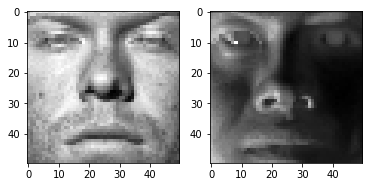

In [4]:
# (d) Mean Subtraction. Subtract average face µ from every column in X. That is, xi
# := xi − µ,
# where xi
# is the i-th column of X. Pick a face image after mean subtraction from the new X
# and display that image in grayscale. Do the same thing for the test set Xtest using the precomputed
# average face µ in (c).
train_face_ms = train_data[10,] - average_face
test_face_ms = test_data[10,] - average_face

f, (ax1, ax2) = plt.subplots(1, 2)
average_face =  np.average(train_data,axis = 0)
ax1.imshow(train_face_ms.reshape(50,50), cmap = cm.Greys_r)
ax2.imshow(test_face_ms.reshape(50,50), cmap = cm.Greys_r)
plt.show()

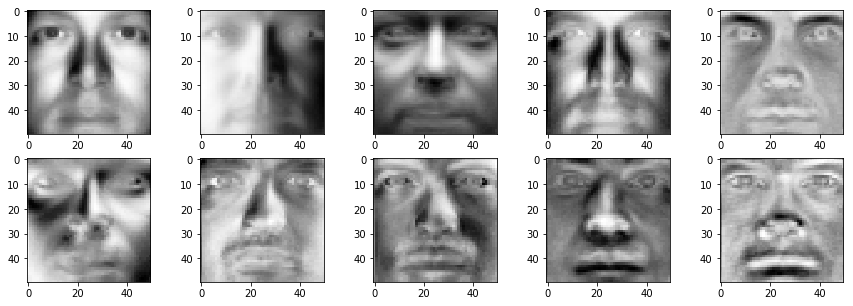

In [5]:
# (e) Eigenface. Perform Singular Value Decomposition (SVD) on training set X (X = UΣV
# T
# ) to get
# matrix V
# T
# , where each row of V
# T has the same dimension as the face image. We refer to vi
# ,
# the i-th row of V
# T
# , as i-th eigenface. Display the first 10 eigenfaces as 10 images in grayscale.
face_svd = train_data-average_face
U, s, V = np.linalg.svd(face_svd, full_matrices=True)
f, ax = plt.subplots(2, 5,figsize=(15,5))
ax = ax.flatten()
[ax[i].imshow(V[i,].reshape(50,50), cmap = cm.Greys_r) for i in range(10)]
plt.show()

In [6]:
# (f ) Low-rank Approximation. Since Σ is a diagonal matrix with non-negative real numbers on
# the diagonal in non-ascending order, we can use the first r elements in Σ together with first
# r columns in U and first r rows in V
# T
# to approximate X. That is, we can approximate X by
# Xˆ
# r = U[:,: r ] Σ[: r,: r ] V
# T
# [: r,:]. The matrix Xˆ
# r is called rank-r approximation of X. Plot the
# rank-r approximation error kX−Xˆ
# rkF
# 2
# as a function of r when r = 1, 2,..., 200.
sigma = np.diag(s)
def compute_x_hat(U,s,V,r):
    return  U[:,:r].dot(s[:r,:r]).dot(V[:r,:])
y = [compute_x_hat(U,sigma,V,r) for r in range(1,201)]

dist = [np.linalg.norm(x - face_svd) for x in y ]

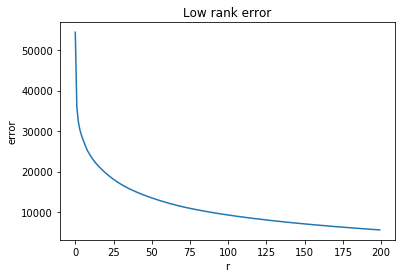

In [7]:
plt.title("Low rank error")
plt.xlabel('r')
plt.ylabel('error')
plt.plot(dist)
plt.show()

In [8]:
# (g) Eigenface Feature. The top r eigenfaces V
# T
# [: r,:] = {v1, v2,..., vr }
# T
# span an r -dimensional
# linear subspace of the original image space called face space, whose origin is the average face
# µ, and whose axes are the eigenfaces {v1, v2,..., vr }. Therefore, using the top r eigenfaces
# {v1, v2,..., vr }, we can represent a 2500-dimensional face image z as an r -dimensional feature
# vector f: f = V
# T
# [: r,:] z = [v1, v2,..., vr ]
# T
# z. Write a function to generate r -dimensional feature
# matrix F and Ftest for training images X and test images Xtest, respectively (to get F, multiply X
# to the transpose of first r rows of V
# T
# , F should have same number of rows as X and r columns;
# similarly for Xtest).

def generate_features(X,V,r):
    return X.dot(V[:r,:].T)


In [9]:
# (h) Face Recognition. Extract training and test features for r = 10. Train a Logistic Regression
# model using F and test on Ftest. Report the classification accuracy on the test set. Plot the
# classification accuracy on the test set as a function of r when r = 1, 2,..., 200. Use “one-vsrest”
# logistic regression, where a classifier is trained for each possible output label. Each
# classifier is trained on faces with that label as positive data and all faces with other labels as
# negative data. sklearn calls this “ovr” mode.
def return_features(x,V,r,train_data,test_Data):
    train_features = [generate_features(x,V,r) for x in train_data]
    test_features =  [generate_features(x,V,r) for x in test_data]
    return train_features,test_features

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
logit= LogisticRegression()
accuracy = []
for r in xrange(1, 201):
    train_features,test_features = return_features(x,V,r,train_data,test_data)
    logit.fit(train_features, train_label)
    accuracy.append(logit.score(test_features, test_label))

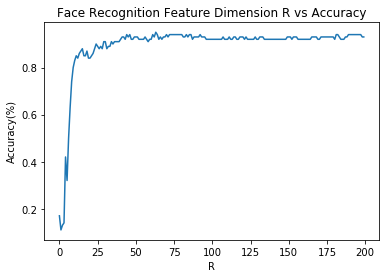

In [11]:
plt.plot(accuracy)
plt.xlabel("R")
plt.ylabel("Accuracy(%)")
plt.title("Face Recognition Feature Dimension R vs Accuracy")
plt.show()